# Week 5: Taylor Approximations
Demo by Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen, and Magnus Troen

In [1]:
from sympy import *
from sympy.abc import x,y,z,u,v,w,t
from dtumathtools import *
init_printing()

## Taylor Polynomials for Functions of one Variable

We would like to try to approximate, respectively, $\ln(x)$ and $\sin(x)$ via Taylor polynomials and investigate how the degree of the polynomials influence the approximation of the original function.

The command for Taylor expansion in SymPy is `series` and it has the following format:

$\verb|series(function, variable, x0, K+1)|$

**NOTE!!**: It is important to remember that the number of terms $K$ in SymPy's function call must be one larger than the $K$ that is described in the textbook. So, if one wants for instance an approximating polynomial of the sixth degree with the expansion point $x_0 = 0$, meaning $P_6(x)$, for the function $\cos(x)$, one must in SymPy write:

In [2]:
series(cos(x), x, 0, 7)

Furthermore one can see that SymPy adds the term $O(x^{K+1})$. This notation is called "Big O" and means, roughly speaking, that the error approaches zero faster than $x^{N+1}$. So, it is a description of the remainder term $R_K(x)$ as in **Taylor's formula 4.3.2** in the text book. It can, though, **not** be used for finding an expression of the remainder function. For that you must yourself make investigations on the function in the intented interval.

If we only want the Taylor polynomial (and not information about the size of the error), we will remove the $O(x^{K+1})$ term using $\verb|.removeO()|$:

In [3]:
series(cos(x), x, 0, 7).removeO()

This is now a polynomial we can evaluate. So, with this information we can now investigate functions and their approximations. Consider for example the function $f:=\ln(x)$:

Here we will first create a plot with $\verb|show = False|$, in order for us to add the other plots to this same plot with $\verb|.extend()|$.
From our plot it is clear to see that when we increase $K$, our approximation becomes better as well. We briefly check the same thing for $\sin(x)$, this time with $x_0 = 0$:

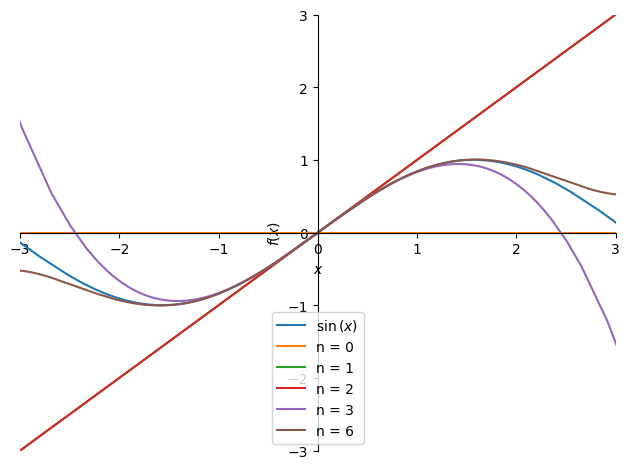

In [4]:
pl = plot(sin(x),xlim = (-3,3), ylim = (-3,3), show=False, legend = True)
for K in [0,1,2,3,6]:
    newseries = series(sin(x),x,0,K+1).removeO()
    display(Eq(Function(f'P_{K}')(x), newseries))
    newplot = plot(newseries,label = f"n = {K}", show=False)
    pl.extend(newplot)
pl.show()

Here we can see that only four different lines are clearly visible. If one looks above the plot, it is clear why. By definition we know that 

\begin{align*}
P_0(x) &= f(x_0) = \sin(0) = 0 \\
P_1(x) &= f(x_0)  + f'(x_0)(x-x_0)\\ 
       &= \sin(0) + \cos(0) x \\
       &= x \\
P_2(x) &= f(x_0)  + f'(x_0)(x-x_0) + \frac{1}{2} f''(x_0)(x-x_0)^2 \\ 
       &= \sin(0) + \cos(0) x - \sin(0) x^2 \\
       &= x
\end{align*}

for $x\in\mathbb{R}$.

## Evaluation of Remainder Function using Taylor's Formula

We want to try to find an approximate value of $\ln\left(\frac{5}{4}\right)$ using the approximating polynomial $P_3(x)$ expanded from the point $x_0=1$.

We shall first determine $P_3(x)$:

In [5]:
x = symbols("x")
P3 = series(ln(x),x,1,4).removeO()
P3

In [6]:
val = P3.subs(x,Rational(5/4))
val, val.evalf()

We konw from **Taylor's formula 4.3.1** that a $\xi \in ]1;\frac{5}{4}[$ exists such that the error $R_3(\frac{5}{4})$ can be written as:

\begin{equation*}
    R_3\left(\frac{5}{4}\right) = \frac{f^{(4)}(\xi)}{4!}\cdot\left(\frac{5}{4} - 1\right)^4.
\end{equation*}

Here we shall first find out which number in the interval for $\xi$ thta leads to the largest possible error. If we approximate our error with this, we can be certain that the **_true_** error is smaller. $f^{(4)}(\xi)$ is the only term that is dependent on $\xi$ and is determined to be

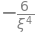

In [7]:
xi = symbols("xi")
diff(ln(x),x,4).subs(x,xi)

Here we get the result $-\frac{6}{\xi^4}$. Now we shall just analyse the expression to find out which $\xi$ that makes the expressions largest possible. We can in this case see that $\xi$ is found in the denominator, and the expression thus increases if $\xi$ decreases. That means for this case that we simply have to choose the smallest value possible for $\xi$, which in this case is 1. Now we can carry out our evaluation of the error.

In [8]:
R3 = abs(diff(ln(x),x,4).subs(x,1) * (5/4 - 1) ** 4 /(factorial(4)))
display(Eq(Function('R_3')(S('5/4')), R3))
print('The correct value of ln(5/4) is in the interval:')
Interval(val - R3, val + R3)

The correct value of ln(5/4) is in the interval:


We have now evaluated the error, and we can now garantee that the true value of $\ln(\frac{5}{4})$ is within the interval $]0.2229;0.2250[$, (open due to rounding).
Let us compare this with Python's value (which in itself is an approximation),

In [9]:
ln(5/4), Interval(val - R3, val + R3).contains(ln(5/4))

(0.22314355131421, True)

## Limit Values using Taylor's Limit Formula

We will now use Taylor's limit formula to determine the limit value of different expressions. This is often usable for fractions where the numerator, denominator, or both contain expressions that are not easy to work with. The way to access Taylor's limit formula in SymPy is via the function $\text{series}$, where we avoid using $\text{.removeO()}$ afterwards. In the textbook, epsilon functions are used, but SymPy uses the $O$ symbol. The two concepts are not entirely comparable, but if SymPy writes $O(x^{K+1})$, we can replace that  by $\varepsilon(x) \, x^{K}$, where $\varepsilon(x) \to 0$ for $x \to 0$.

### Example 1

We will first investigate the expression $\frac{\sin(x)}{x}$ when $x\rightarrow 0$,

In [10]:
series(sin(x),x,0,n=3)

This gives us
\begin{gather*}
    \frac{\sin(x)}{x} = \frac{x + \epsilon (x) \cdot x^2}{x} = 1 + \epsilon (x)x \rightarrow 1, \text{ when } x \rightarrow 0
\end{gather*}

### Example 2

It can sometimes feel like guess work to figure out how many terms one needs to include, when one is to find a limit value using Taylor's limit formula. Let us for example try 

\begin{equation*}
\frac{\mathrm e^x - \mathrm e^{-x} - 2x}{x-\sin(x)},
\end{equation*}


where $x \rightarrow 0$. Let us evaluate the numerator and denominator separately and see what happens when we include more and more terms.

In [11]:
T = E ** x - E ** (-x) - 2*x
N = x - sin(x)
series(T,x,0,2), series(N,x,0,2)

Too imprecise since we only get the remainter term.

In [12]:
series(T,x,0,3), series(N,x,0,3)

Still too imprecise.

In [13]:
series(T,x,0,4), series(N,x,0,4)

Here we have something where both terms have something usable. Here we get:

\begin{gather*}
    \frac{\frac{x^3}{3}+\epsilon(x)x^3}{\frac{x^3}{6}+\epsilon(x)x^3} = \\
    \frac{\frac{1}{3} + \epsilon(x)}{\frac{1}{6}+\epsilon(x)} \rightarrow \frac{\frac{1}{3}}{\frac{1}{6}} = 2, \text{ when } x \rightarrow 0
\end{gather*}

As a check we can use the $\text{limit()}$ function

In [14]:
limit(T/N,x,0)

## Taylor Polynomials for Functions of Two Variables

We consider the following function of two variables:

$$
f:\mathbb{R}^2 \to \mathbb{R},\quad f(x,y) = \sin(x^2 + y^2).
$$

It is plotted below:

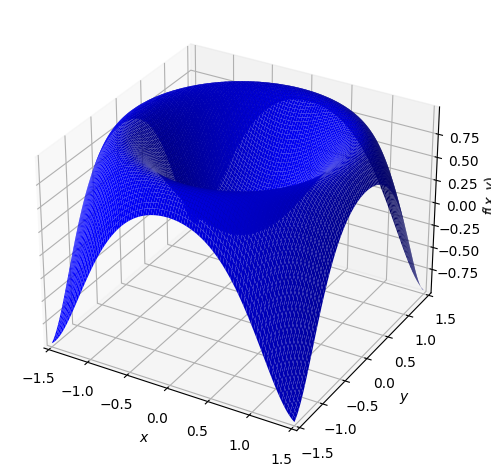

In [15]:
x,y = symbols("x y", real = True)
f = sin(x ** 2 + y ** 2)
dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),rendering_kw={"color" : "blue"})

Let us determine the approximating first-degree polynomial with expansion point $(0,0)$

In [16]:
P1 = dtutools.taylor(f,[x,0,y,0],degree=2)
P1

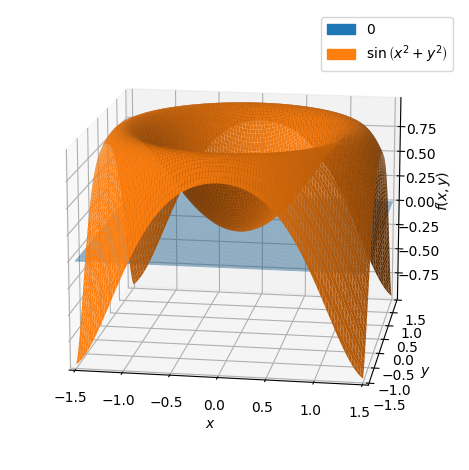

In [17]:
p = dtuplot.plot3d(P1,(x,-1.5,1.5),(y,-1.5,1.5),show=false,rendering_kw={"alpha" : 0.5},camera={"azim":-81,"elev":15})
p.extend(dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False))
p.show()

Here we can see that $P1$ is located in the $(x,y)$ plane. With expansion point $(1/10,0)$ we have:

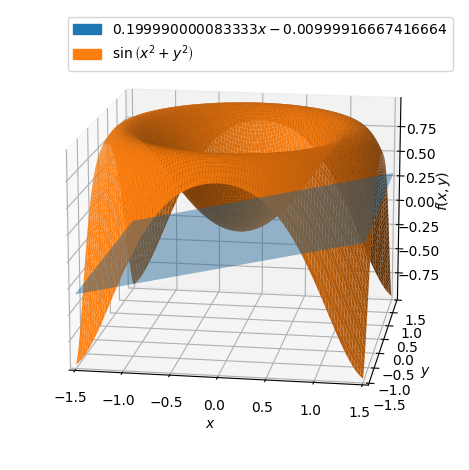

In [18]:
p = dtuplot.plot3d(dtutools.taylor(f,[x,0.1,y,0],degree=2),(x,-1.5,1.5),(y,-1.5,1.5),show=false,rendering_kw={"alpha" : 0.5},camera={"azim":-81,"elev":15})
p.extend(dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False))
p.show()

We will return to the expansion point $(0,0)$. Let us see how the approximating second-degree polynomial looks:

In [19]:
P2 = dtutools.taylor(f,[x,0,y,0],3)
P2

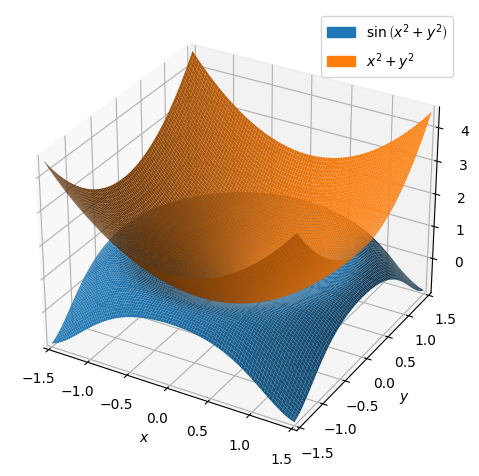

In [20]:
dtuplot.plot3d(f,P2,(x,-1.5,1.5),(y,-1.5,1.5))

This time, the approximating polynomial is an elliptic paraboloid.
Lastly, let us have a look at how the approximating sixth-degree polynomial looks:

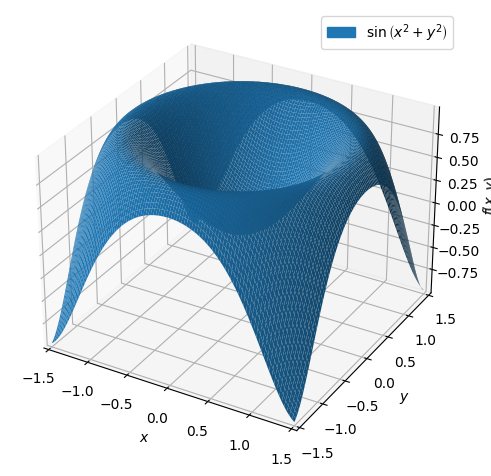

In [21]:
P6 = dtutools.taylor(f,[x,0,y,0],7)
p = dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False)
p.legend=True
p.show()

As expected, they are now much closer to each other.
Let us investigate the error for these polynomials at different points to see how will they fit.
Let us begin with $(0.2,0.2)$:

In [22]:
f_p1 = f.subs([(x, 1/5), (y, 1/5)])
P1_p1 = P1.subs([(x, 1/5), (y, 1/5)])
P2_p1 = P2.subs([(x, 1/5), (y, 1/5)])
P6_p1 = P6.subs([(x, 1/5), (y, 1/5)])

RHS_list = (f_p1 - P1_p1, f_p1 - P2_p1, f_p1 - P6_p1)
displayable_equations = [ Eq(Function(f'P_{i}')(S('1/5')), expression) for i, expression in zip((1,2,6), RHS_list) ]

display(*displayable_equations)

It all looks right. The error is much smaller for the approximating polynomials of higher degrees.
Let us try with $(0.5,0.5)$:

In [23]:
f_p2 = f.subs([(x,1/2),(y,1/2)])
P1_p2 = P1.subs([(x,1/2),(y,1/2)])
P2_p2 = P2.subs([(x,1/2),(y,1/2)])
P6_p2 = P6.subs([(x,1/2),(y,1/2)])

RHS_list = (f_p2 - P1_p2, f_p2 - P2_p2, f_p2 - P6_p2)
displayable_equations = [ Eq(Function(f'P_{i}')(S('1/5')), expression) for i, expression in zip((1,2,6), RHS_list) ]

display(*displayable_equations)

The farther away from the expansion point $(0,0)$ we go, the larger is an error must we expect. 

(It should be mentioned that our comparisons are based on the assumption that SymPy's own approximations are much better than ours. This is most likely quite a good assumption in this case, but it is important to know that SymPy, Maple, and all other computer tools also perform approximations.)

## Taylor Polynomials for functions of Three Variables

Consider the function:

\begin{equation*}
f: \mathbb{R}^3\to \mathbb{R},\quad f(x_1,x_2,x_3) = \sin(x_1^2 - x_2)e^{x_3}.
\end{equation*}

We wish to determine the second-degree Taylor polynomial with expansion point $\boldsymbol{x}_0 = (1,1,0)$.

In [24]:
x1,x2,x3 = symbols('x1,x2,x3', real = True)
f = sin(x1**2 - x2)*exp(x3)
f

The second-degree Taylor polynomial for a function of multiple variables is given by

\begin{equation*}
P_2(\boldsymbol{x}) = f(\boldsymbol{x}_0) + \left<(\boldsymbol{x} - \boldsymbol{x}_0), \nabla f(\boldsymbol{x}_0)\right> + \frac{1}{2}\left<(\boldsymbol{x} - \boldsymbol{x}_0), \boldsymbol{H}_f(\boldsymbol{x}_0)(\boldsymbol{x}-\boldsymbol{x}_0)\right>
\end{equation*}

First we define $\boldsymbol{x}_0$ and $\boldsymbol{x}$:

In [25]:
x = Matrix([x1,x2,x3])
x0 = Matrix([1,1,0])

Then we find $\nabla f(\boldsymbol{x}_0)$ and $\boldsymbol{H}_f(\boldsymbol{x}_0)$:

In [26]:
nabla_f = dtutools.gradient(f,(x1,x2,x3)).subs([(x1,x0[0]),(x2,x0[1]),(x3,x0[2])])
nabla_f

⎡2 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣0 ⎦

In [27]:
Hf = dtutools.hessian(f,(x1,x2,x3)).subs([(x1,x0[0]),(x2,x0[1]),(x3,x0[2])])
Hf

⎡2  0   2 ⎤
⎢         ⎥
⎢0  0   -1⎥
⎢         ⎥
⎣2  -1  0 ⎦

Now $P_2$ can be determined:

In [28]:
P2 = f.subs([(x1,x0[0]),(x2,x0[1]),(x3,x0[2])]) + nabla_f.dot(x - x0) + S('1/2')* (x - x0).dot(Hf*(x - x0))
P2.simplify()

We can now have a look at the difference between the approximating polynomial and the true function at some chosen values:

In [29]:
v1 = Matrix([1,1,0])
v2 = Matrix([1,0,1])
v3 = Matrix([0,1,1])
v4 = Matrix([1,2,3])
vs = [v1,v2,v3,v4]

In [30]:
for v in vs:
    print((f.subs({x1:v[0],x2:v[1],x3:v[2]}) - P2.subs({x1:v[0],x2:v[1],x3:v[2]})).evalf())

0
0.287355287178842
0.712644712821158
-12.9013965351501


Again we see that the error increases when we move farther away from the expansion point.